C:\Users\Shaurya\AppData\Local\Temp\ipykernel_5772\2262377676.py:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=data.fillna(method='bfill')


SVM classification accuracy 0.7988826815642458


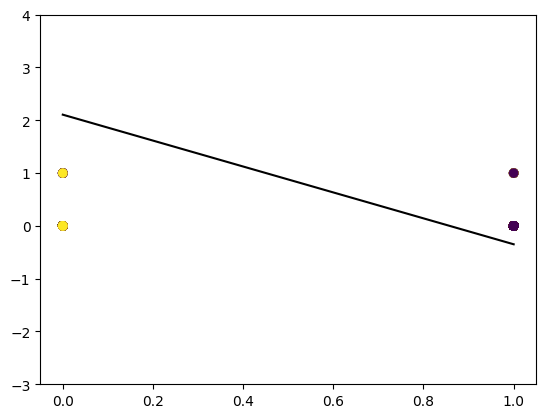

0.8434782608695652


In [4]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class SVM:

    def __init__(self, learning_rate=0.005, lambda_param=0.01, n_iters=80):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets
    import matplotlib.pyplot as plt
    data = pd.read_csv("C:\\Users\\Shaurya\\Downloads\\titanic.csv")
    data.Sex=data.Sex.replace({'male':0,'female':1})
    data.Embarked=data.Embarked.replace({'Q':0,'C':1,'S':2})
    data=data.fillna(method='bfill')
    data['Age'] = pd.cut(x=data['Age'], bins=[-np.inf,17, 60, np.inf], labels=['1', '2', '3']) 
    data['Age']=np.asarray(data['Age'], dtype='int64')
    data['Fare'] = pd.cut(x=data['Fare'], bins=[-np.inf,10, 30, 60, np.inf], labels=['0', '1', '2','3']) 
    data['Fare']=np.asarray(data['Fare'], dtype='int64')
    #data.Age.replace('NaN',data.Age.mean())
    #data.Embarked.replace('NaN','0')
    X = data[['Pclass','Age','Embarked','Sex','Fare']]
    y = data['Survived']
    for i in X.T:
        fmin = X.min()
        frange = X.max() - X.min()
        X -= fmin
        X /= frange
    X = np.asarray(X, dtype='int64')
    y = np.asarray(y, dtype='int64')
    y = np.where(y == 0, -1, 1)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    clf = SVM()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    print("SVM classification accuracy", accuracy(y_test, predictions))

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()
    c=confusion_matrix(y_test,predictions)
    Precision = c[0][0] / (c[0,0] + c[1,0])
    Recall = c[0,0] / (c[0,0] + c[0,1])
    F1Score = 2 * (Precision * Recall) / (Precision + Recall)
    
    print(F1Score)

